## Mitsiu Alejandro Carreño Sarabia - E32S-18014

Entrena un perceptrón multicapa para predecir el precio de las viviendas en la tarea anterior.     
Puedes utilizar una o varias variables (recomiendo mas de una)      
Recuerda lo aprendido en Sistemas Inteligentes acerca de la preparación de los datos.     
No olvides normalizar las variables      
Evalúa su desempeño y da tus conclusiones (esta parte es importante)      
Entrega un cuaderno de colab con tu código y tus comentarios.      

## Carga y descripción de datos

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["HouseVal"])

In [2]:
print(data.feature_names)
print(y.shape)
print(X.shape)
print(data.DESCR)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 1)
(20640, 8)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median 

In [3]:
print(X.isna().sum())
X = X.dropna()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [4]:
X.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [5]:
y.tail()

,HouseVal
20635,0.781
20636,0.771
20637,0.923
20638,0.847
20639,0.894


In [6]:
x1 = X["Latitude"] # Latitude
x2 = X["Longitude"] # Longitude

x_ = np.array([x1, x2])
x_ = np.transpose(x_)
x_.shape

(20640, 2)

## Normalización via sklearn

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_)
x_scaled = scaler.transform(x_)
print(x_scaled.mean(axis=0))
print(x_scaled.std(axis=0))

[-1.07958431e-15 -8.52651283e-15]
[1. 1.]


## Train y test datasets

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

## Creación de modelo (Keras)

In [9]:
from tensorflow import keras

modelo = keras.models.Sequential()
modelo.add(keras.layers.Dense(4, input_dim=2))
modelo.add(keras.layers.Dense(1))
modelo.compile(loss="mean_squared_error", optimizer="Adam", metrics=["accuracy"])
history = modelo.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=0)

2023-10-04 10:47:45.909050: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 10:47:46.026210: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 10:47:46.027959: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 10:47:48.062374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Se eligió una red de dos capas, con una función de perdida "mean_squared_error" por tratarse de un problema de regresión, y el optimizador Adam que toma el descenso de gradiente, se configuraron 100 epochs con batches de 100, la función de perdida mean_squared_error para penalizar más los errores grándes.

## Gráficas loss y val_loss

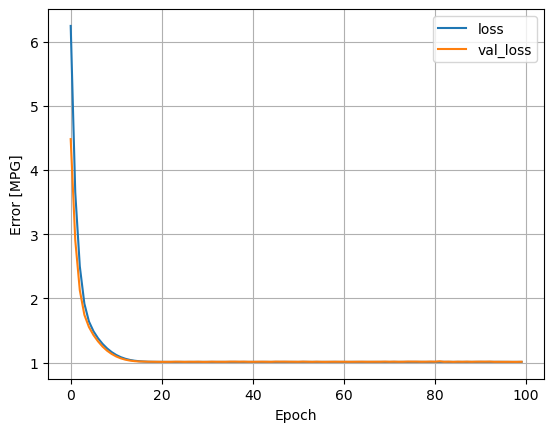

In [10]:
import matplotlib.pyplot as plt

def plot_loss(history):
  '''
  min_val_loss = min(history.history["val_loss"])
  min_loss = min(history.history["loss"]) 
  plt_min = min_val_loss < min_loss ? min_val_loss : min_loss

  max_val_loss = max(history.history['val_loss'])
  max_loss = max(history.history[l])
  '''
    
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  
  #plt.ylim([plt_min, max()
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

## Evaluación con datos no vistos

In [11]:
loss, accuracy = modelo.evaluate(x_test, y_test, batch_size=None, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Pérdida en el conjunto de prueba: 1.0072
Precisión en el conjunto de prueba: 0.27%


In [12]:
preds = modelo.predict(
    x_test,
    verbose="auto"
)

129/129 [==============================] - 1s 3ms/step


In [13]:
preds[:,0].shape
y_test.shape
diff = y_test - preds

diff.mean()

HouseVal   -0.004669
dtype: float64

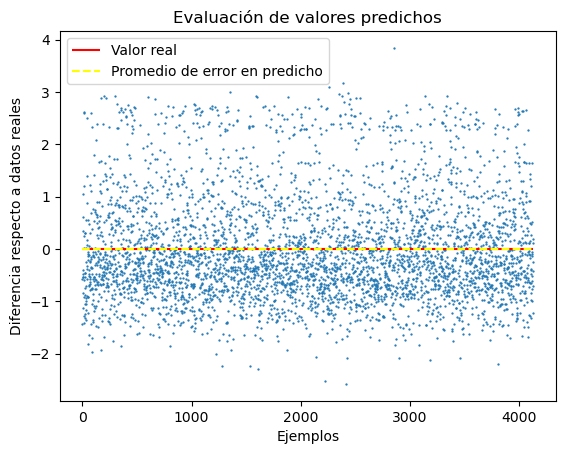

In [14]:
plt.scatter(np.arange(0,y_test.shape[0]), diff, s=.4)
plt.hlines(y=0, xmin=0, xmax=y_test.shape[0], color="red", label="Valor real")
plt.hlines(y=diff.mean(), xmin=0, xmax=y_test.shape[0], color="yellow", linestyles="dashed", label="Promedio de error en predicho")
plt.xlabel("Ejemplos")
plt.ylabel("Diferencia respecto a datos reales")
plt.title("Evaluación de valores predichos")
plt.legend()


## Conclusiones
A pesar de que nuestro modelo tiene una precisión muy baja con datos que no ha visto, podemos observar que en grán parte de se debe a errores de precisión, la diferencia entre los datos reales y los datos predichos en promedio ronda 0.0119, otra aproximación sería "categorizar" los datos de salida redondeando los decimales, pero ¿no sé si eso sea una buena práctica?

# Segunda aproximación 
(basado en el tutoria https://www.tensorflow.org/tutorials/keras/regression)

## Regresión lineal con una sola variable (AveRooms)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
x_train.describe().transpose()[["mean", "std"]]

,mean,std
MedInc,3.883195,1.900211
HouseAge,28.647832,12.588412
AveRooms,5.450438,2.641133
AveBedrms,1.099462,0.511476
Population,1428.705971,1144.037371
AveOccup,3.090365,11.467644
Latitude,35.631680,2.132184
Longitude,-119.571011,2.003293


## Normalizar mediante capa de keras

In [17]:
normalizer = keras.layers.Normalization(axis=-1)

In [18]:
normalizer.adapt(np.array(x_train))

Ajustamos la capa de normalización a los datos de entrenamiento

In [19]:
print(normalizer.mean.numpy())

[[ 3.8831949e+00  2.8647839e+01  5.4504333e+00  1.0994629e+00
   1.4287059e+03  3.0903671e+00  3.5631706e+01 -1.1957103e+02]]


In [20]:
first = np.array(x_train[:1])

print("Original data", first)
print()
print("Normalized:", normalizer(first).numpy())

Original data [[ 3.43750000e+00  2.10000000e+01  4.80065717e+00  9.86856517e-01
   2.68900000e+03  2.94523549e+00  3.38200000e+01 -1.18290000e+02]]

Normalized: [[-0.23455735 -0.6075486  -0.24602923 -0.22016647  1.1016538  -0.01265614
  -0.8497211   0.63948077]]


Podemos invocar esta capa con cada variable normalizada de manera independiente

In [21]:
feature = "AveRooms"
ave_rooms = np.array(x_train[feature])

ave_rooms_normalizer = keras.layers.Normalization(input_shape=[1,], axis=None)
ave_rooms_normalizer.adapt(ave_rooms)

Primero vamos a intentar predecir tomando solo una variable (AveRooms)

In [22]:
ave_rooms_model = keras.Sequential([
    ave_rooms_normalizer,
    keras.layers.Dense(units=1)
])

ave_rooms_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [23]:
ave_rooms_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error"
)

De manera similar podemos tomamos la función de optimización Adam y una perdida con mean_absolute_error (porque se trata de un problema de regresión)

In [24]:
%%time
history = ave_rooms_model.fit(
    x_train[feature],
    y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

CPU times: user 5min 19s, sys: 2min 20s, total: 7min 40s
Wall time: 3min


In [25]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.877573,0.870970,95
96,0.876552,0.880960,96
97,0.878069,0.879008,97
98,0.877232,0.881541,98
99,0.874780,0.872369,99


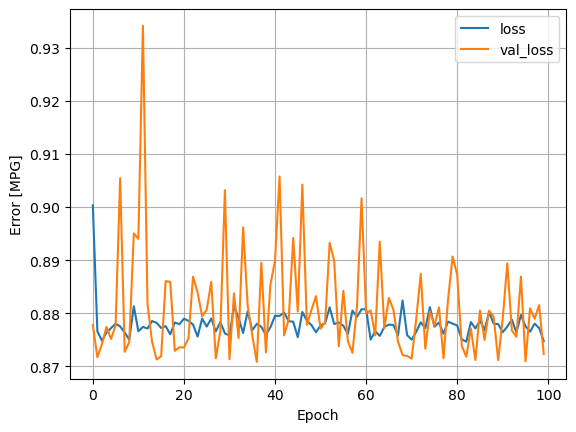

In [26]:
plot_loss(history)

Podemos notar que los datos no convergen y son dificiles de estimar, por lo que se debe de optimizar con distintos hiperparametros

In [27]:
test_results = {}
test_results["ave_rooms_model"] = ave_rooms_model.evaluate(
    x_test[feature],
    y_test,
    verbose=0
)

5/5 [==============================] - 0s 4ms/step


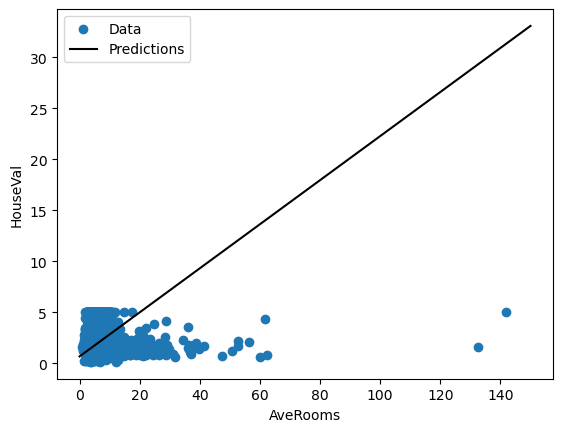

In [28]:
x = np.linspace(0.0, 150, 151)
y = ave_rooms_model.predict(x)

plt.scatter(x_train[feature], y_train, label='Data')
plt.plot(x, y, color="k", label="Predictions")
plt.xlabel(feature)
plt.ylabel("HouseVal")
plt.legend()

También es posible dado que es una regresión basada en una sola variable, gráficar la predicción.

In [29]:
'''
x_test.tail()
np.array(x_test[feature])
type(y_test)
'''
#loss, accuracy = ave_rooms_model.evaluate(x_test[feature], y_test, batch_size=None, verbose=0)
#print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
#print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

TypeError: cannot unpack non-iterable float object

Aquí estoy un poco perdido en porque no puedo evaluar el modelo? :(

## Regresión lineal con todas las variables

In [30]:
linear_model = keras.Sequential([
    normalizer,
    keras.layers.Dense(units=1)
])

In [31]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.3444967 ],
       [ 0.566846  ],
       [-0.06851399],
       [ 0.02443492],
       [ 0.30855083],
       [ 0.15777177],
       [-0.2720002 ],
       [-0.05706245]], dtype=float32)>

Podemos explorar y comprobar que se estan generando n pesos basados en las n variables

In [32]:
linear_model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error"
)

In [33]:
%%time
history = linear_model.fit(
    x_train,
    y_train,
    epochs=100,
    verbose = 0,
    validation_split=0.2
)

CPU times: user 5min 36s, sys: 2min 14s, total: 7min 51s
Wall time: 3min 9s


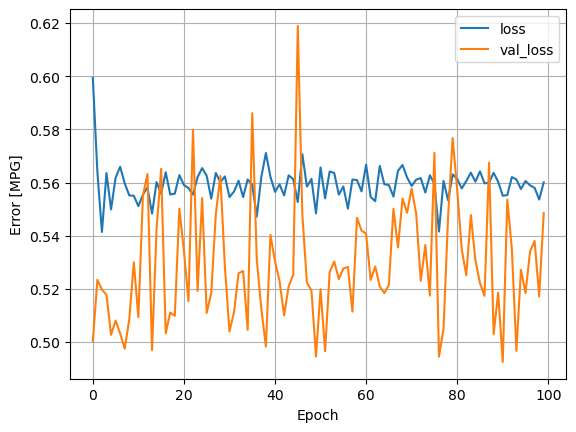

In [34]:
plot_loss(history)

In [35]:

test_results["linear_model"] = linear_model.evaluate(
    x_test, 
    y_test,
    verbose=0
)

In [36]:
pd.DataFrame(test_results, index=['Mean absolute error [HouseVal]']).T

,Mean absolute error [HouseVal]
ave_rooms_model,0.866641
linear_model,0.554021


Finalmente podemos observar que a pesar de que un modelo tomando todas las variables disminuye nuestro error, ambos modelos se desempeñan medianamente bien, y supongo que al igual que en la primera aproximación, se debe a problemas de precisión de decimales.